# Assignment - 1

# EDA and ML Model Building

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Reading the data

In [2]:
data = pd.read_csv("C:/Users/Mayank/Downloads/ms.csv")

In [3]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [4]:
data.describe()
#We use this function to get a rough idea what the data is about

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


It is important to know what types of data we have (categorical/dicrete/continuous) to proceed with data wrangling.

In [5]:
data.nunique()

Date                     257
product                    1
phase                      1
campaign_platform          2
campaign_type              2
communication_medium       2
subchannel                 4
audience_type              4
creative_type              3
creative_name              4
device                     4
age                        7
spends                  9087
impressions             1188
clicks                   263
link_clicks              160
dtype: int64

## Finding out what types of unique vales are present.

In [6]:
data['age'].unique()

array(['18-24', '25-34', '35-44', 'Undetermined', '45-54', '55-64',
       '65 or more'], dtype=object)

In [7]:
data['communication_medium'].unique()

array(['Search Keywords', 'Creative'], dtype=object)

In [8]:
data['audience_type'].unique()

array(["'-", 'Audience 2', 'Audience 3', 'Audience 1'], dtype=object)

In [9]:
data['creative_type'].unique()

array(["'-", 'Carousal', 'Image'], dtype=object)

In [10]:
data['creative_name'].unique()

array(["'-", 'Carousal', 'Click', 'Girl'], dtype=object)

In [11]:
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

## Dropping the non-essential columns

In [12]:
data = data.drop(['product','phase','audience_type','creative_type','creative_name','communication_medium','subchannel' ],axis = 1)

In [13]:
data.head()

,Date,campaign_platform,campaign_type,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Google Ads,Search,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Google Ads,Search,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Google Ads,Search,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Google Ads,Search,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Google Ads,Search,Desktop,18-24,53.31,10,2,0.0


## Deriving the corelation between the features


In [14]:
corelation = data.corr()

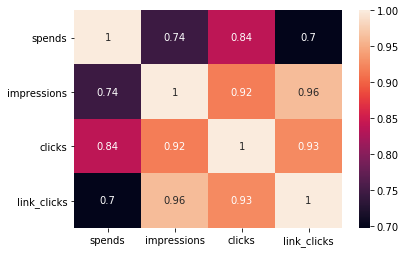

In [15]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels =corelation.columns,annot=True)

### As we can see the most important features are spends,impressions,clicks and link clicks.

## Now lets try to plot the features against each other

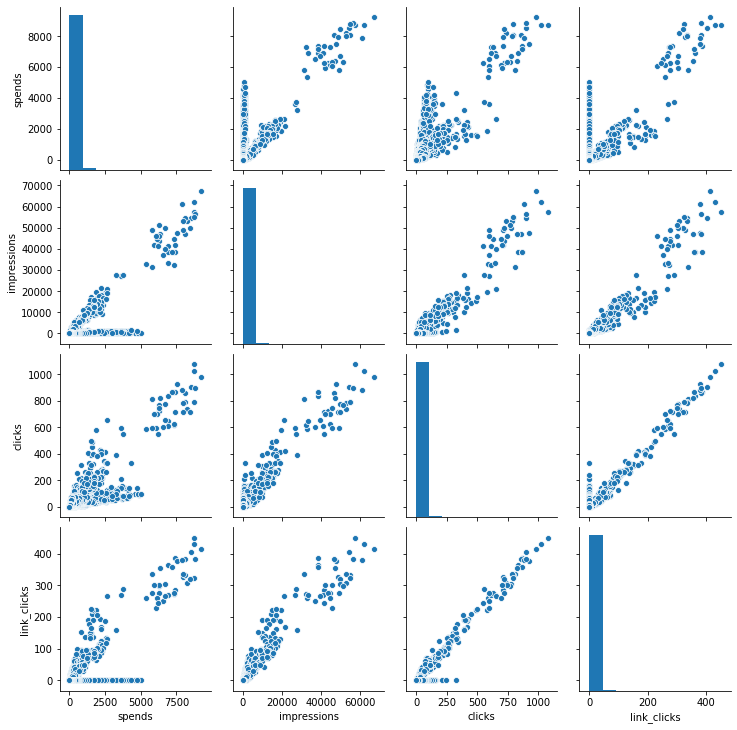

In [16]:
sns.pairplot(data)

### From here we figure the outliers

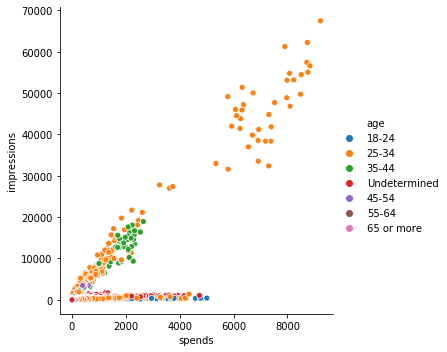

In [17]:
sns.relplot(x='spends',y='impressions',hue='age',data =data)

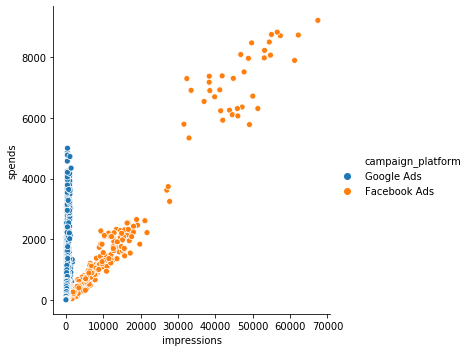

In [18]:
sns.relplot(x='impressions',y='spends',hue='campaign_platform',data =data)

In [19]:
data.head()

,Date,campaign_platform,campaign_type,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Google Ads,Search,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Google Ads,Search,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Google Ads,Search,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Google Ads,Search,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Google Ads,Search,Desktop,18-24,53.31,10,2,0.0


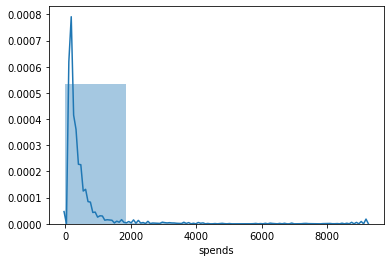

In [20]:
sns.distplot(data['spends'],bins=5)

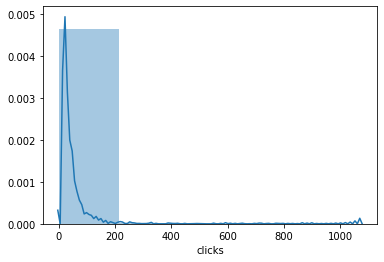

In [21]:
sns.distplot(data['clicks'],bins=5)

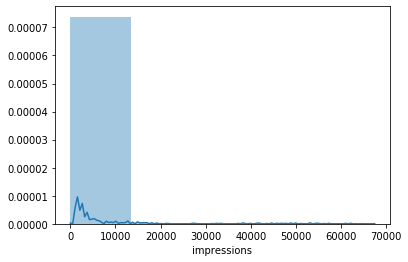

In [22]:
sns.distplot(data['impressions'],bins=5)

# A Simple Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Here predicting score for spends by considering training impressions and clicks

In [24]:
train = data.drop(['Date','spends','campaign_platform','campaign_type','device','age','link_clicks'],axis=1)
test = data['spends']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(train, test , test_size=0.3,random_state=2)

In [26]:
reg = LinearRegression()

In [27]:
reg.fit( x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
pred = reg.predict(x_test)

In [29]:
pred

array([72.88998586, 32.9661716 , 42.97655072, ..., 42.8196144 ,
       32.9661716 , 32.92693751])

In [30]:
reg.score(x_test,y_test)

0.7090057955689095

## Accuracy of 70.90